In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
IMAGE_SIZE = [224, 224]
train_path = 'D:/thesis_word/images/training'
valid_path = 'D:/thesis_word/images/testing'

In [9]:
folders = glob('D:/thesis_word/images/training/*')

In [5]:
# x = Flatten()(nasnet_large.output)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import NASNetLarge


nasnet_large = NASNetLarge(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


for layer in nasnet_large.layers:
    layer.trainable = False


x = Flatten()(nasnet_large.output)
prediction = Dense(1, activation='sigmoid')(x)

model = Model(inputs=nasnet_large.input, outputs=prediction)


model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:/thesis_word/images/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/thesis_word/images/training',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 8845 images belonging to 3 classes.
Found 8845 images belonging to 3 classes.


Epoch 1/100
277/277 [==============================] - 173s 578ms/step - loss: 1.4351 - accuracy: 0.5651 - val_loss: 1.1120 - val_accuracy: 0.5161
Epoch 2/100
277/277 [==============================] - 92s 332ms/step - loss: 1.6249 - accuracy: 0.5621 - val_loss: 1.1362 - val_accuracy: 0.5972
Epoch 3/100
277/277 [==============================] - 88s 319ms/step - loss: 1.6441 - accuracy: 0.5615 - val_loss: 1.4538 - val_accuracy: 0.4929
Epoch 4/100
277/277 [==============================] - 88s 316ms/step - loss: 1.7451 - accuracy: 0.5620 - val_loss: 1.4672 - val_accuracy: 0.5070
Epoch 5/100
277/277 [==============================] - 88s 317ms/step - loss: 1.8040 - accuracy: 0.5619 - val_loss: 1.3552 - val_accuracy: 0.5077
Epoch 6/100
277/277 [==============================] - 88s 318ms/step - loss: 1.7743 - accuracy: 0.5622 - val_loss: 1.4992 - val_accuracy: 0.6285
Epoch 7/100
277/277 [==============================] - 87s 315ms/step - loss: 1.7109 - accuracy: 0.5619 - val_loss: 1.7035 

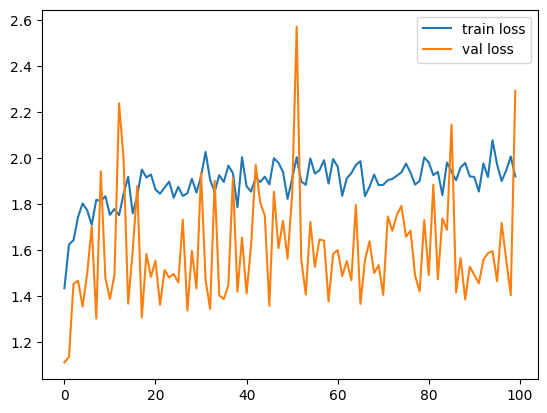

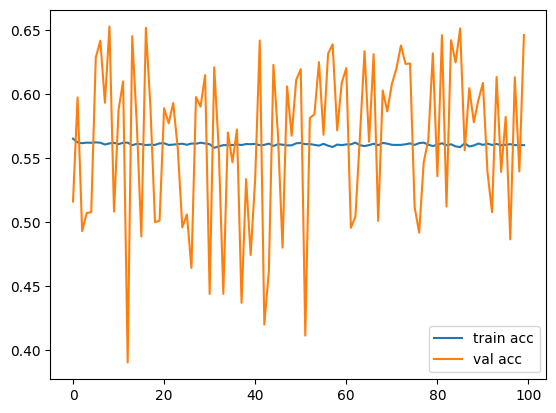

277/277 [==============================] - 49s 160ms/step
Confusion Matrix:
[[   0    0    0]
 [4462    0    0]
 [4383    0    0]]


<Figure size 640x480 with 0 Axes>

In [11]:

r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=100,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have test data and ground truth labels
y_true = np.concatenate([test_set[i][1] for i in range(len(test_set))])
y_pred_probs = model.predict(test_set)
y_pred = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(np.argmax(y_true, axis=1), y_pred)

print("Confusion Matrix:")
print(cm)


277/277 [==============================] - 44s 159ms/step


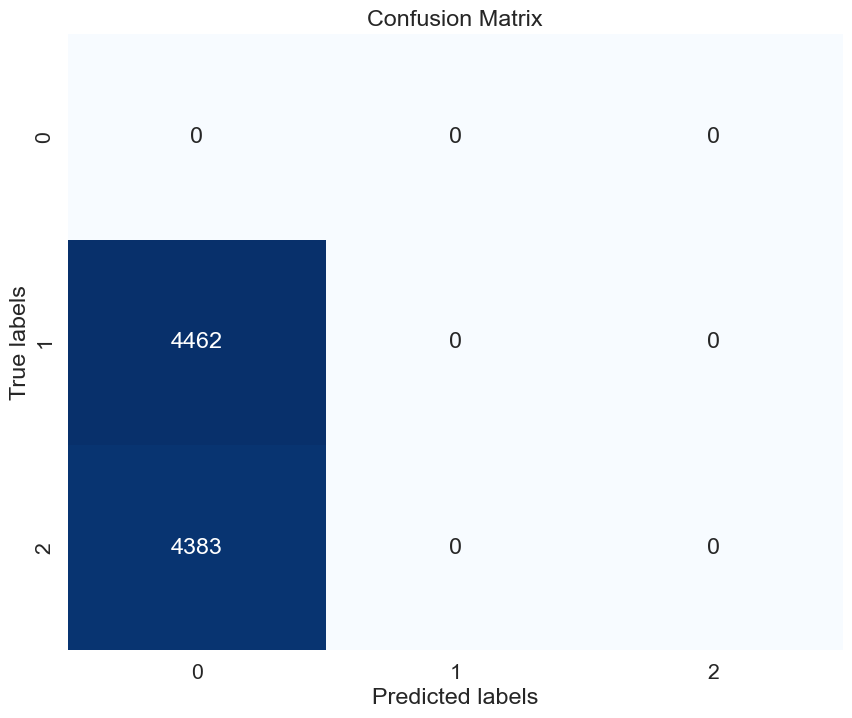

In [12]:
# Assuming you have test data and ground truth labels
y_true = np.concatenate([test_set[i][1] for i in range(len(test_set))])
y_pred_probs = model.predict(test_set)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(np.argmax(y_true, axis=1), y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.png')  # Save the confusion matrix as a PNG file
plt.show()

In [14]:
import tensorflow as tf

In [16]:
model_path = 'model/my_model.h5'

# Save the model in .h5 format
tf.keras.models.save_model(model, model_path, save_format='h5')
